<a href="https://colab.research.google.com/github/poojabongale/Flipkart-Project/blob/main/Flipkart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flipkart Project**
Predicting and Analyzing Customer Satisfaction at Flipkart Using Machine Learning and Sentiment Analysis

A Machine learning project that predicts CSAT score based on customer remarks, response time for solving the issues of the customers, agent performance enabling Flipkart to improve customer satisfaction and retention.

# **Project** **Summary**
Developed a machine learning solution to predict Customer Satisfaction (CSAT) scores using Flipkart customer service data. The project leveraged customer remarks, response time, agent performance, and order-related metadata to model customer sentiment and satisfaction levels.

Performed feature engineering by calculating response time in minutes and extracting sentiment polarity from customer remarks using vader sentiment analyser. Trained a Random Forest Classifier,Logistic Regression and HistGradientBoostingClassifier to capture non-linear relationships between features and satisfaction scores, achieving strong performance.

To move beyond prediction, implemented prescriptive logic:

Tickets with predicted CSAT < 3 were flagged for escalation to senior agents.

Support agents with average response times > 45 minutes were flagged for training, based on grouped analysis.

# GITHub **Link**
https://github.com/poojabongale/Flipkart-Project/blob/main/Flipkart.ipynb

# **Data** **Wrangling**


Libraries used:

Pandas: Data Manipulation

Numpy: Working with linear algebra

Matplotlib and Seaborn: Visualization library

TextBlob: Providing sentiment scores to customer remarks

Sklearn : Tools for machine learning and modelling


# **About the data**
The data is fetched from customer_support_Data.csv file and it consists of the following parameters


Unique id : Unique identifier for each record

Channel name : Name of the customer service channel

Category : Category of the interaction

Sub-category : Sub-category of the interaction

Customer Remarks : Feedback provided by the customer

Order id : Unique id given to each order

Order date time : Date and time of the order placed

Issue reported at : Time when the issue was reported

Issue responded : Time when the issue was responded to

Survey response date : Date of the customer survey response

Customer city : City of the customer

Product category : Category of the product

Item price : Price of the item

Connected handling time : Time taken to handle the interaction

Agent name : Name of the customer service agent

Supervisor : Name of the supervisor

Manager : Name of the manager

Tenure Bucket : Bucket categorizing agent tenure

Agent Shift : Shift timing of the agent

CSAT Score : Customer Satisfaction (CSAT) score

# **Importing the libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install TextBlob

In [4]:
#Loading th dataset
df = pd.read_csv('/content/Customer_support_data.csv')

In [5]:
#checking the total number of null values in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [6]:
#Check for missing values
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [7]:
#Handling the missing values
df['Customer Remarks'] = df['Customer Remarks'].fillna(0)
df['Customer_City'] = df['Customer_City'].fillna('Unknown')
df['Product_category'] = df['Product_category'].fillna('Unknown')
df['Item_price'] = df.groupby('Product_category')['Item_price'].transform(lambda x: x.fillna(x.median()))
df['order_date_time'] = df['order_date_time'].fillna('Unknown')
df['was_order_related'] = df['Order_id'].notnull().astype(int)
df['Order_id'] = df['Order_id'].fillna("No_Order")



In [8]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,0
Order_id,0
order_date_time,0
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


# **Plot for CSAT scores vs No of Responses**

/tmp/ipython-input-9-1270078976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CSAT Score', palette='flare')


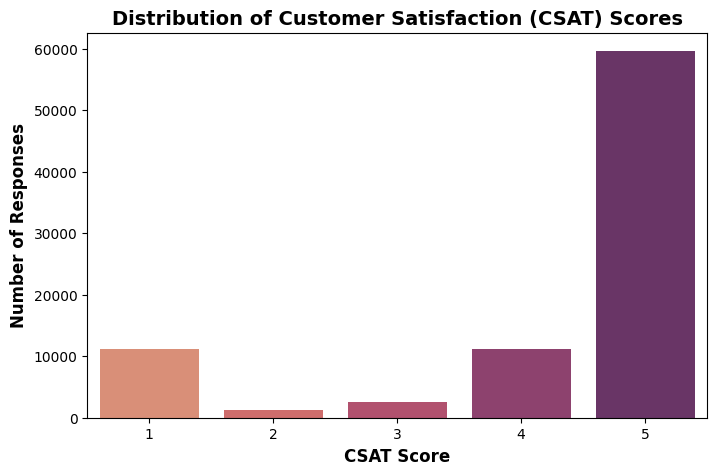

In [9]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df, x='CSAT Score', palette='flare')

plt.title("Distribution of Customer Satisfaction (CSAT) Scores", fontsize=14, fontweight='bold')
plt.xlabel("CSAT Score", fontsize=12,fontweight = 'bold')
plt.ylabel("Number of Responses", fontsize=12,fontweight = 'bold')

plt.show()


In this graph the relationshio between CSAT score and no. of responses is displayed. Approximately 10K-11k customers have given 1 CSAT Score. More the responses better to classify and understand the customer satisfaction.  

In [10]:
#Converting the customer remarks to a sentiment score using TextBlob
from textblob import TextBlob

# Safely convert all entries to string (including numbers or NaN)
df['Customer Remarks'] = df['Customer Remarks'].astype(str)

# Now apply TextBlob sentiment polarity
df['remark_sentiment'] = df['Customer Remarks'].apply(lambda x: TextBlob(x).sentiment.polarity)


# **Plot for Sentiment score vs CSAT score**

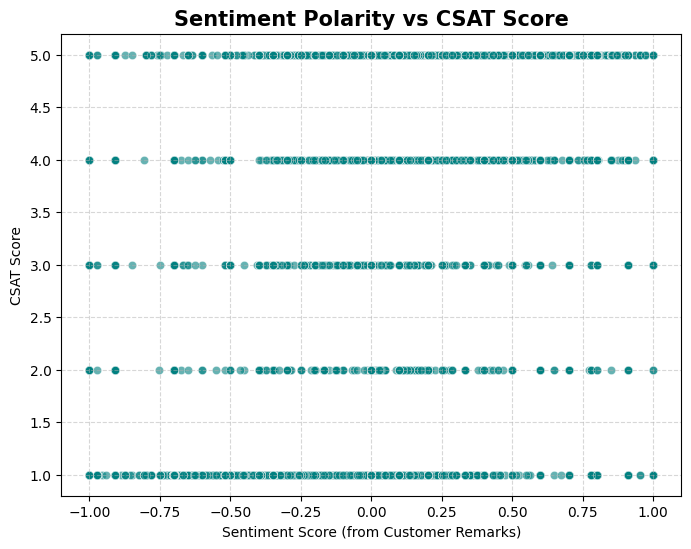

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['remark_sentiment'], y=df['CSAT Score'], alpha=0.6, color='teal')

plt.title("Sentiment Polarity vs CSAT Score", fontsize=15, fontweight='bold')
plt.xlabel("Sentiment Score (from Customer Remarks)")
plt.ylabel("CSAT Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

So this graph helps in understanding how customer remarks can influence CSAT score. Here the customer remarks are converted to a numeric score so that it can be plotted on a graph. If the sentiment score is -1(very negative) then the CSAT score is 1(dissatisified). But on contrary there are few cases in which the sentiment score is 1(very positive) but the CSAT score is -1, this is because the model that I have used is TextBlob which is a rule based sentiment analysis that fails to understand sarcasm. For eg. If one customer remarks is "My service was delayed by 4 hours and thanks to the agent who did nothing." So here the customer is stating resentment but the model mistakes the remark as positive because of the work "thanks".

# Predicting the CSAT scores in future

# **Random Forest Classifier**

In the following code CSAT score is predicted based on a number of parameters such as the response time to the issues(how quickly the issue is resolved), customer remarks, order time and date. With these parameters the model helps in predicting the future csat scores.

In [12]:
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')

df['response_time_minutes'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

df['Customer_City'] = df['Customer_City'].fillna('Unknown')
df['Product_category'] = df['Product_category'].fillna('Unknown')

df['has_remarks'] = df['Customer Remarks'].notnull().astype(int)
df['was_order_related'] = df['Order_id'].notnull().astype(int)

In [13]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df['remark_sentiment'] = df['Customer Remarks'].astype(str).apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [14]:
# Length of remark — helps capture detail in the message
df['remark_length'] = df['Customer Remarks'].astype(str).apply(len)

In [15]:
# Time of day (extract from order_date_time if available)
df['order_hour'] = pd.to_datetime(df['order_date_time'], errors='coerce').dt.hour

/tmp/ipython-input-15-2530433093.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_hour'] = pd.to_datetime(df['order_date_time'], errors='coerce').dt.hour


The following code predicts the future CSAT scores based on the features such as sentiment score, response time and order_date_time.
Random Forest is a robust supervised machine learning model that works well with categorical and numeric data. It works efficiently well even with missing data, outliers and noisy dataset. Apart from this it automatically captures non linear relationship (sentiment score and CSAT score).

In [16]:
def bucket(score):
    if score <= 2:
        return "Low"
    elif score == 3:
        return "Medium"
    else:
        return "High"

df['CSAT_Level'] = df['CSAT Score'].apply(bucket)


In [17]:
y = df['CSAT_Level']


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['CSAT Score', 'CSAT_Level', 'Unique id'])
y = df['CSAT Score'] # Use the original numerical CSAT Score as the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import LabelEncoder

X_train = X_train.drop(columns=['order_date_time', 'Issue_reported at', 'issue_responded', 'Customer Remarks', 'Order_id'], errors='ignore')
X_test = X_test.drop(columns=['order_date_time', 'Issue_reported at', 'issue_responded', 'Customer Remarks', 'Order_id'], errors='ignore')


label_encoders = {}

for col in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))

    # Replace unseen labels in X_test with a placeholder before transforming
    test_unknown_mask = ~X_test[col].astype(str).isin(le.classes_)
    X_test[col] = X_test[col].astype(str).mask(test_unknown_mask, 'Unknown')

    # Add 'Unknown' to the classes_ if it's not already present and transform
    if 'Unknown' not in le.classes_:
         le.classes_ = np.append(le.classes_, 'Unknown')

    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7126644162495634


In [21]:
importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False))


Agent_name                 0.157188
response_time_minutes      0.150731
Survey_response_Date       0.136008
Supervisor                 0.101703
remark_sentiment           0.081026
Sub-category               0.071413
remark_length              0.051777
Manager                    0.038661
Tenure Bucket              0.035307
Agent Shift                0.033751
category                   0.031193
Item_price                 0.027246
channel_name               0.026582
Customer_City              0.024462
order_hour                 0.020261
Product_category           0.012103
connected_handling_time    0.000590
was_order_related          0.000000
has_remarks                0.000000
dtype: float64


# **Predicting the scores using Logistic Regression**

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['remark_sentiment'] = df['Customer Remarks'].astype(str).apply(
    lambda x: analyzer.polarity_scores(x)['compound']
)
X_train_lr = X_train.fillna(X_train.mean(numeric_only=True))
X_test_lr = X_test.fillna(X_test.mean(numeric_only=True))



In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Drop the datetime columns from X_train and X_test
lr_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train_lr, y_train)
y_pred_lr = lr_model.predict(X_test_lr)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6975905016878128


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Predicting the scores using Histogram Gradient Boosting Classifier**

HistGradientBoostingClassifier is a variant of Gradient Boosting Classifier. It is much faster than Gradient Boosting Classifier for handling data greater than 100 samples. The estimator has native support for NaN values as well.

In [24]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Train the model
hgb_model = HistGradientBoostingClassifier(random_state=42)
hgb_model.fit(X_train, y_train)

hgb_pred = hgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, hgb_pred))


Accuracy: 0.7229658945407985


# **Comparing the accuracy metrics for the models**
Root Mean Squared Error is a evaluation metric that is used for regression models. It is the square root of mean squared error(the avg. squared difference between predicted and actual values).

R2 is an evaluation metric that signifies the proportion of variation between the dependent and the independent variable. It tells how correctly the model has predicted the values. A higher R2 value suggest a better fit.

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a function to evaluate a model
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted')
    }

# Evaluate all models
rf_metrics = evaluate_model(y_test, y_pred)
lr_metrics = evaluate_model(y_test, y_pred_lr)
hgb_metrics = evaluate_model(y_test, hgb_pred)

# Create results DataFrame
results = pd.DataFrame([
    {'Model': 'Random Forest', **rf_metrics},
    {'Model': 'Logistic Regression', **lr_metrics},
    {'Model': 'HistGradientBoosting', **hgb_metrics}
])

# Sort by highest Accuracy (or any other metric)
results = results.sort_values(by='Accuracy', ascending=False)

# Display the table
print(results)


                  Model  Accuracy  Precision    Recall  F1 Score
2  HistGradientBoosting  0.722966   0.589284  0.722966  0.637924
0         Random Forest  0.712664   0.604316  0.712664  0.633016
1   Logistic Regression  0.697591   0.550169  0.697591  0.588110


To add further business logic, the following code checks if the predicted CSAT score is <3 then recommedation is sent to senior agent for handling the crisis.

In [27]:
X_test['Predicted CSAT'] = y_pred
X_test['Escalation Recommended'] = X_test['Predicted CSAT'].apply(lambda x: 'Yes' if x < 3 else 'No')


In [28]:
# Display top 10 cases with predicted CSAT and escalation flag
X_test_display = X_test.copy()
X_test_display['Actual CSAT'] = y_test.values  # Add actual CSAT for comparison

# Show relevant columns
X_test_display[['Predicted CSAT', 'Actual CSAT', 'Escalation Recommended']].head(10)


,Predicted CSAT,Actual CSAT,Escalation Recommended
67871,5,5,No
40187,5,5,No
60075,5,5,No
69560,5,5,No
2605,5,5,No
73327,5,5,No
4382,5,1,No
10405,5,5,No
24494,5,5,No
5473,5,1,No


# **Plot for Escalation Recommende tickets vs No of Cases**

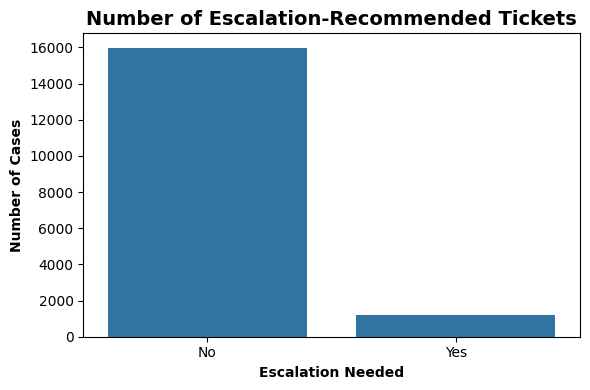

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Escalation Recommended', data=X_test)
plt.title("Number of Escalation-Recommended Tickets", fontsize=14, fontweight='bold')
plt.xlabel("Escalation Needed",fontweight='bold')
plt.ylabel("Number of Cases",fontweight='bold')
plt.tight_layout()
plt.show()


Here if the response time taken by agents is > 45 minutes then training should be given so that they can handle the issues efficiently in less amount of time.

In [31]:
# Group by agent and calculate average response time
agent_response = df.groupby('Agent_name')['response_time_minutes'].mean().reset_index()

# Flag for training
agent_response['Flag for Training'] = agent_response['response_time_minutes'].apply(
    lambda x: 'Yes' if x > 45 else 'No'
)

# Show top 10
agent_response[['Agent_name', 'response_time_minutes', 'Flag for Training']].head(10)

,Agent_name,response_time_minutes,Flag for Training
0,Aaron Edwards,194.268817,Yes
1,Aaron Romero,20.016949,No
2,Abigail Gonzalez,-53.680000,No
3,Adam Barnett,-38.892857,No
4,Adam Hammond,127.983333,Yes
5,Adam Henderson,78.421053,Yes
6,Adam Hernandez,165.986111,Yes
7,Adam Schwartz,2.129870,No
8,Adam Torres,61.903614,Yes
9,Adrian Branch,94.697674,Yes


# **Plot for No of Agents with Training Flag vs No of agents**

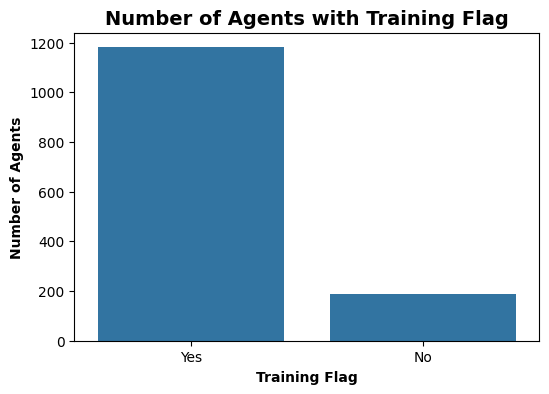

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Flag for Training', data=agent_response)
plt.title("Number of Agents with Training Flag", fontsize=14, fontweight='bold')
plt.xlabel("Training Flag",fontweight='bold')
plt.ylabel("Number of Agents",fontweight='bold')
plt.show()

# **Plot for Actual vs Predicted CSAT scores**

This plot helps in understanding the actual vs predicted csat scores. It is clear that max of samples havealmost same actual and predicted csat scores same.

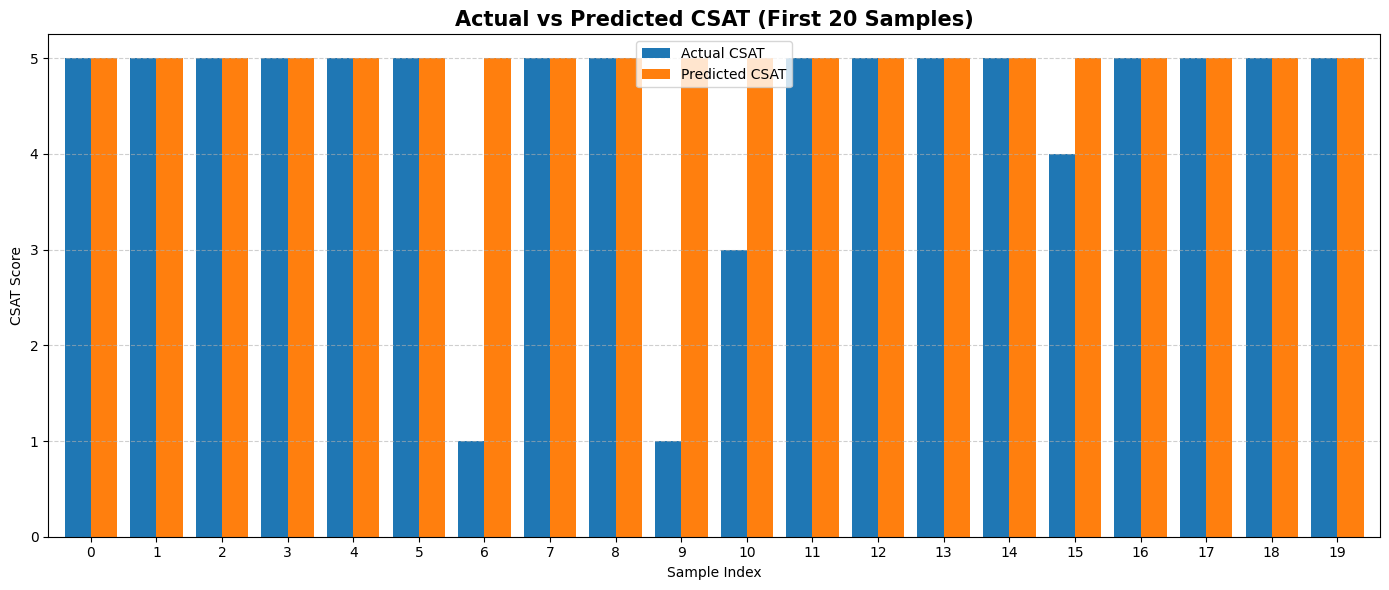

In [34]:
sample_df = pd.DataFrame({
    'Actual CSAT': y_test.values[:20],
    'Predicted CSAT': y_pred[:20]
}).reset_index(drop=True)

sample_df.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title("Actual vs Predicted CSAT (First 20 Samples)", fontsize=15, fontweight='bold')
plt.xlabel("Sample Index")
plt.ylabel("CSAT Score")
plt.xticks(rotation=0)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
